# Phase space tomography

Primer for using phase space tomography tool

In [55]:
%load_ext autoreload
%autoreload
from pstomo.preprocess import Preprocess
import numpy as np
import matplotlib.pyplot as plt
from pstomo.tomo_plot import Plot
from pstomo.reconstruct import Reconstruct
from pstomo.track import Lattice, Model, Track
import pickle
from pstomo import utils



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's use a reconstructed beam to verify that everythng work. We start from the reconstructed beam, track it and try to reconstruct it.

In [61]:

with open('rec_dist_example', 'rb') as f:
    data = pickle.load(f)

dist_in = np.zeros((len(data['x']),4))
dist_in[:,0] = data['x']
dist_in[:,1] = data['px']
dist_in[:,2] = data['y']
dist_in[:,3] = data['py']

ks = np.linspace(-20, 20, 21)
projections_x = []
projections_y = []
for p in range(len(ks)):
    ind = p
    seq = {'quad_1':[0.0708,ks[p]], 'drift_1':[0.831693],'quad_2':[0.0708,5], 'drift_2':[0.4] }
    tr = Track(seq, dist_in)
    tr.track()
    dist_out = tr.dist_out
    projectionx, edgesx = np.histogram(dist_out[:,0], range=(-0.0025, 0.0025), bins=128)
    projectiony, edgesy = np.histogram(dist_out[:,2], range=(-0.0025, 0.0025), bins=128)

    projections_x.append(projectionx/np.sum(projectionx))
    projections_y.append(projectiony/np.sum(projectiony))

projections_x = np.array(projections_x)
projections_y = np.array(projections_y)
pixel_size_x = edgesx[1]-edgesx[0]
pixel_size_y = edgesy[1]-edgesy[0]
x = edgesx[:-1]+pixel_size_x/2
y = edgesy[:-1]+pixel_size_y/2

added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad
added drift
added quad


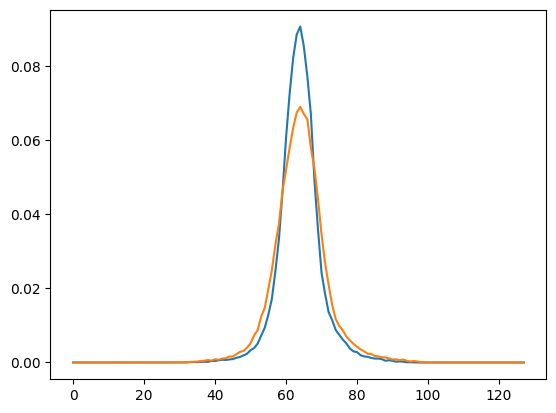

In [64]:
plt.plot(projections_x1[10])
plt.plot(projections_x2[10])

Now it is time to preprocess the data to make them ready for tomography

In [30]:
# %autoreload
sequence = {'quad':[0.0708,10], 'drift':[0.831693]}

processx = Preprocess(projections_x, ks, sequence, pixel_size_x, plane='x', norm=[-0.2, 0.85])
processy = Preprocess(projections_y, ks, sequence, pixel_size_y, plane='y', norm=[-0.2, 1.19])


the process instance is used as input for reconstruction

In [42]:
%autoreload
recx = Reconstruct(processx)
recy = Reconstruct(processy)

dist_x = recx.MLEM(300)
dist_y = recy.MLEM(300)




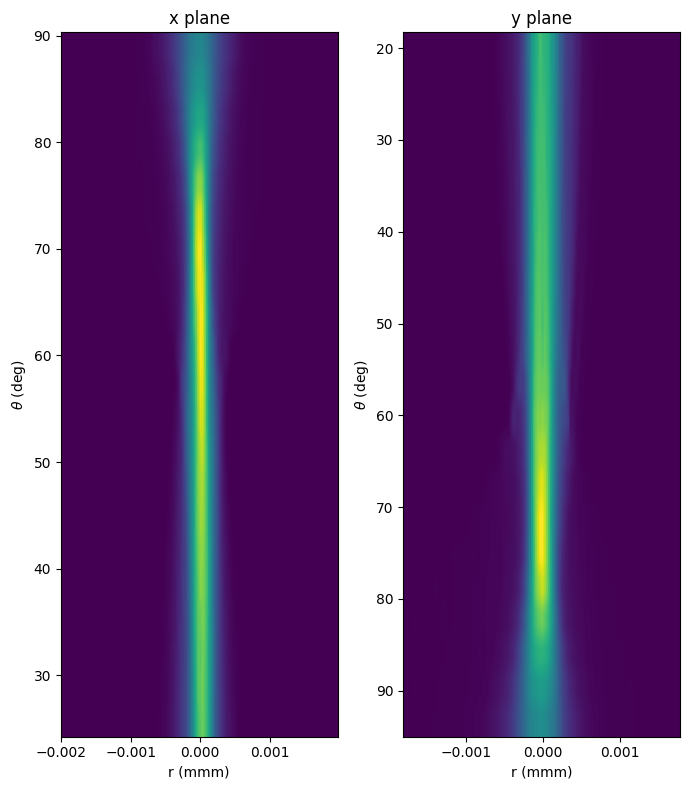

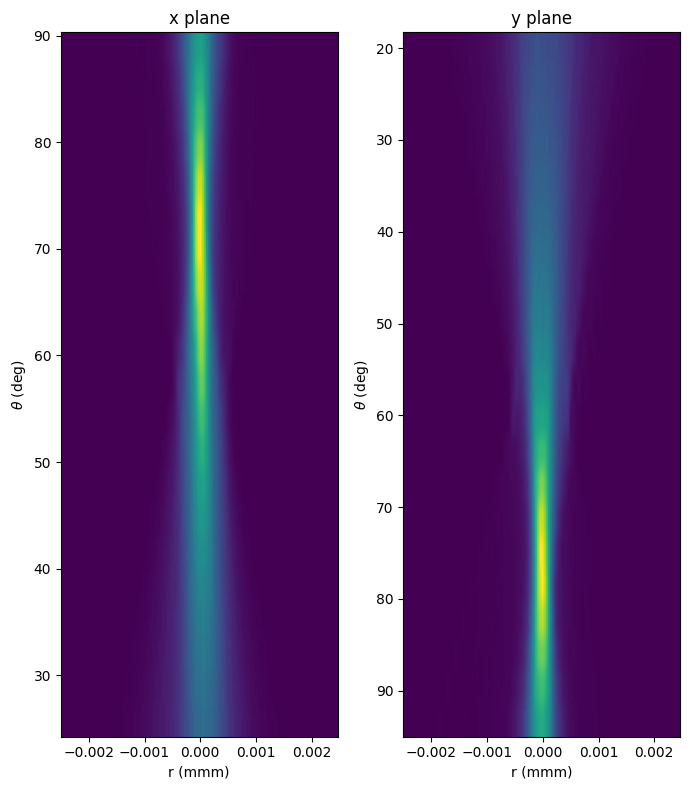

(<Figure size 700x800 with 2 Axes>,
 array([<Axes: title={'center': 'x plane'}, xlabel='r (mmm)', ylabel='$\\theta$ (deg)'>,
        <Axes: title={'center': 'y plane'}, xlabel='r (mmm)', ylabel='$\\theta$ (deg)'>],
       dtype=object))

In [43]:
%autoreload
pl = Plot(processx, processy, dist_x, dist_y)
# Plot scaled sinograms

pl.plot_sino_scale()
# pl.plot_reconstructed()
pl.plot_sino()


Let's generate a distribution from the reconstructed images

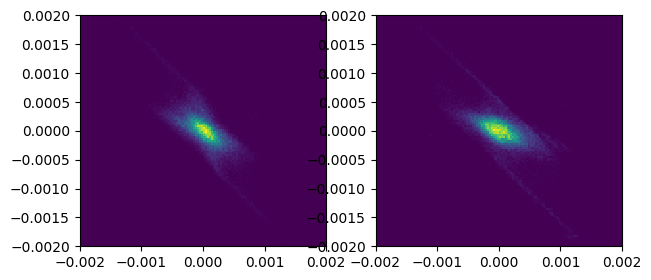

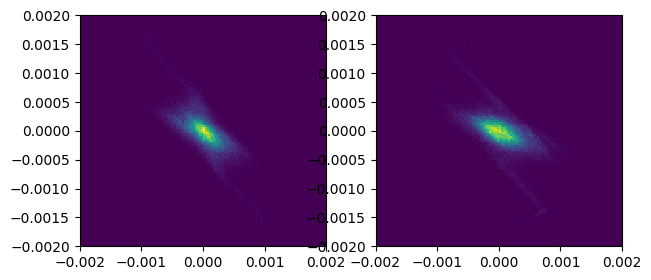

In [44]:
dist_x_part = utils.gen_dist(dist_x, 10000, processx.x_new_sc, processx.x_new_sc)
dist_y_part = utils.gen_dist(dist_y, 10000, processy.x_new_sc, processx.x_new_sc)


dist_x_part_unnorm = utils.apply(processx.Vi,dist_x_part)
dist_y_part_unnorm = utils.apply(processy.Vi,dist_y_part)

dist = np.hstack((dist_x_part_unnorm, dist_y_part_unnorm))

fig, axs = plt.subplots(1, 2, figsize= (7, 3))
_ = axs[0].hist2d(dist_in[:,0], dist_in[:,1], bins = 128, range=[[-2e-3, 2e-3],[-2e-3, 2e-3]])
_ = axs[1].hist2d(dist_in[:,2], dist_in[:,3], bins = 128, range=[[-2e-3, 2e-3],[-2e-3, 2e-3]])
plt.show()

fig, axs = plt.subplots(1, 2, figsize= (7, 3))
_ = axs[0].hist2d(dist[:,0], dist[:,1], bins = 128, range=[[-2e-3, 2e-3],[-2e-3, 2e-3]])
_ = axs[1].hist2d(dist[:,2], dist[:,3], bins = 128, range=[[-2e-3, 2e-3],[-2e-3, 2e-3]])
plt.show()

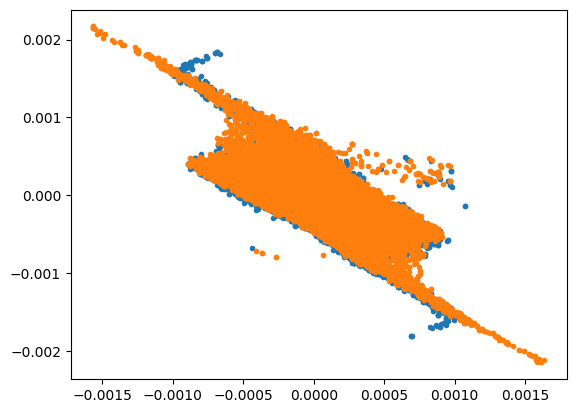

In [45]:
plt.plot(dist[:,0], dist[:,1], '.')
plt.plot(dist_in[:,0], dist_in[:,1], '.')


Text(0, 0.5, 'x (mm)')

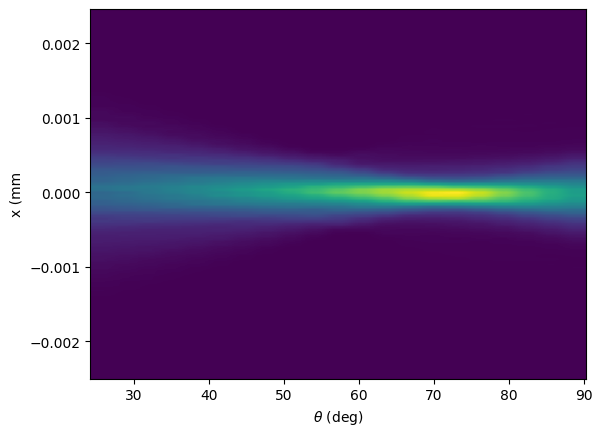

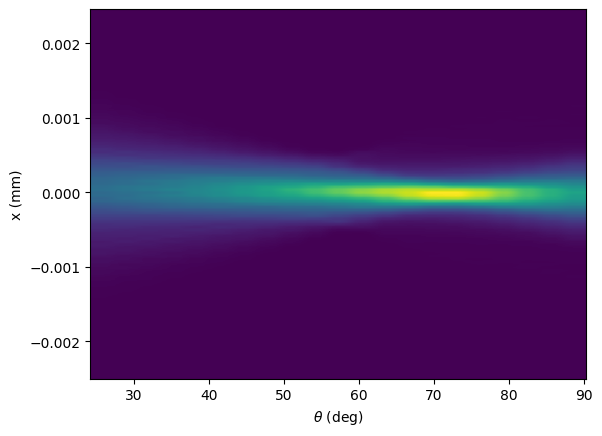

In [46]:
projections,_ = utils.track(dist_x_part_unnorm, processx.thetas, 'x', processx.x_new, processx.Vi, n_bins=128)
proj_trackx = utils.norm_image(projections)
plt.imshow(proj_trackx, origin = 'lower',extent=[processx.thetas[0], processx.thetas[-1], processx.x_new[0], processx.x_new[-1]],  aspect = 'auto', vmax=1)
plt.xlabel('$\\theta$ (deg)')
plt.ylabel('x (mm')


plt.figure()
plt.imshow(utils.norm_image(processx.unscaled_projections).T, origin = 'lower',extent=[processx.thetas[0], processx.thetas[-1], processx.x_new[0], processx.x_new[-1]],  aspect = 'auto', vmax = 1)
plt.xlabel('$\\theta$ (deg)')
plt.ylabel('x (mm)')


Text(0, 0.5, 'x (mm)')

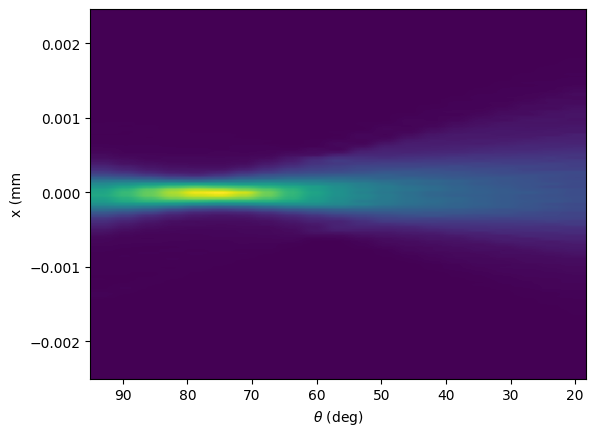

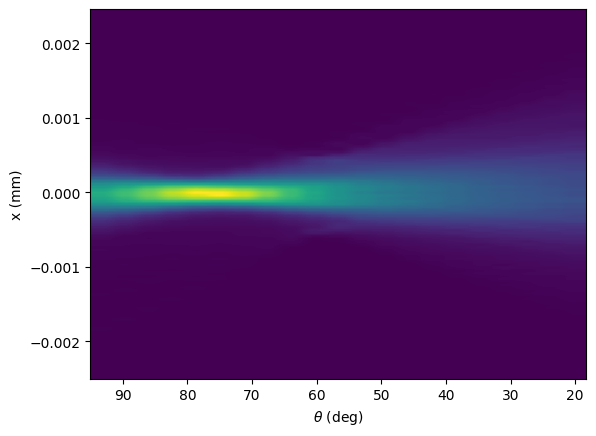

In [47]:
projections,_ = utils.track(dist_y_part_unnorm, processy.thetas, 'y', processy.x_new, processy.Vi, n_bins=128)
proj_tracky = utils.norm_image(projections)
plt.imshow(proj_tracky, origin = 'lower',extent=[processy.thetas[0], processy.thetas[-1], processy.x_new[0], processy.x_new[-1]],  aspect = 'auto', vmax=1)
plt.xlabel('$\\theta$ (deg)')
plt.ylabel('x (mm')

plt.figure()
plt.imshow(utils.norm_image(processy.unscaled_projections).T, origin = 'lower',extent=[processy.thetas[0], processy.thetas[-1], processy.x_new[0], processy.x_new[-1]],  aspect = 'auto', vmax = 1)
plt.xlabel('$\\theta$ (deg)')
plt.ylabel('x (mm)')


# Compare reconstruction methods

In [48]:
%autoreload

twiss_qs_x = recx.QuadScanRec()
twiss_qs_y = recy.QuadScanRec()

covx = twiss_qs_x[0]*np.array([[twiss_qs_x[2], -twiss_qs_x[1]],[-twiss_qs_x[1], twiss_qs_x[3]]])
covy = twiss_qs_y[0]*np.array([[twiss_qs_y[2], -twiss_qs_y[1]],[-twiss_qs_y[1], twiss_qs_y[3]]])
# Generate distribution with same Twiss parameters
dist_qs_x = np.random.multivariate_normal((0,0), covx, size=10000)
dist_qs_y = np.random.multivariate_normal((0,0), covy, size=10000)

dist_qs = np.hstack((dist_qs_x, dist_qs_y))


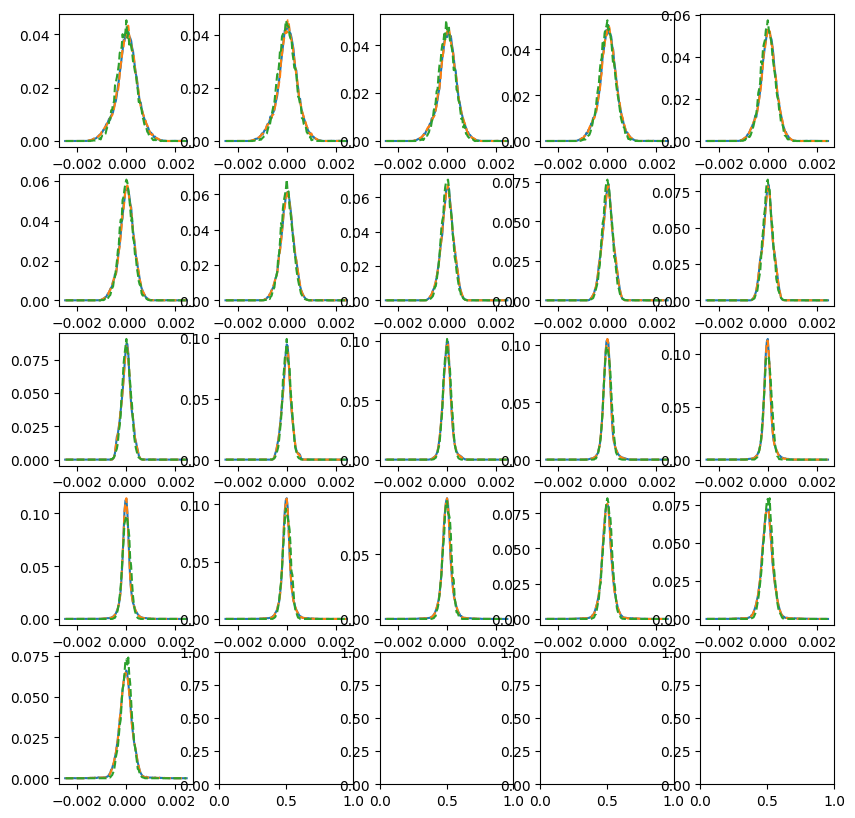

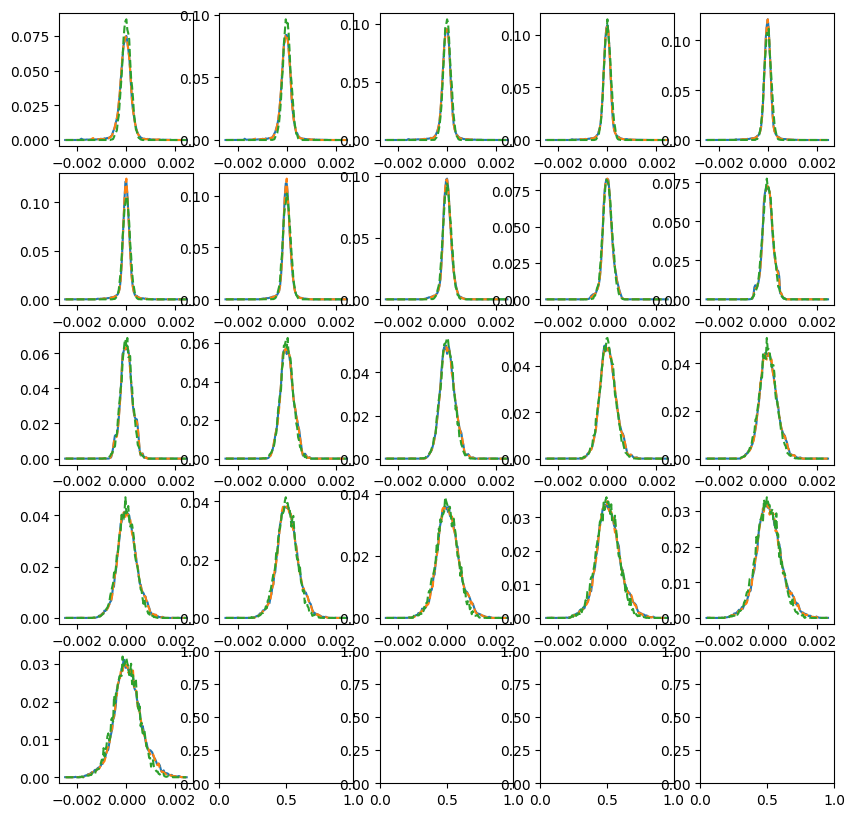

In [49]:
# ph = utils.get_theta_norm(Vi, k, 'x')
%autoreload
figx, axsx = plt.subplots(5,5, figsize = (10, 10))
figy, axsy = plt.subplots(5,5, figsize = (10, 10))
sigmasg_x = []
sigmasg_y = []
sigmas_rec_x = []
sigmas_rec_y = []
axsx = axsx.flatten()[:21]
axsy = axsy.flatten()[:21]

for p in range(len(ks)):
    ind = p
    seq = {'quad':[0.0708,recx.ks[ind]], 'drift':[0.831693]}
    tr = Track(seq, dist)
    tr.track()
    dist_out = tr.dist_out
    tr.dist = dist_qs
    tr.track()
    dist_qs_out = tr.dist_out

    projectionx, edgesx = np.histogram(dist_out[:,0], range=(processx.x_new[0], processx.x_new[-1]), bins=128)
    projectiongx, edgesgx = np.histogram(dist_qs_out[:,0], range=(processx.x_new[0], processx.x_new[-1]), bins=128)
    projectionx = projectionx/np.sum(projectionx)
    projectiongx = projectiongx/np.sum(projectiongx)

    projectiony, edgesy = np.histogram(dist_out[:,2], range=(processy.x_new[0], processy.x_new[-1]), bins=128)
    projectiongy, edgesgy = np.histogram(dist_qs_out[:,2], range=(processy.x_new[0], processy.x_new[-1]), bins=128)
    projectiony = projectiony/np.sum(projectiony)
    projectiongy = projectiongy/np.sum(projectiongy)

    axsx[p].plot(processx.x_new, processx.unscaled_projections[ind,:]/np.sum(processx.unscaled_projections[ind,:]))
    axsx[p].plot(utils.get_bin_centers(edgesx), projectionx, linestyle = '--')
    axsx[p].plot(utils.get_bin_centers(edgesgx), projectiongx, linestyle = '--')

    axsy[p].plot(processy.x_new, processy.unscaled_projections[ind,:]/np.sum(processy.unscaled_projections[ind,:]))
    axsy[p].plot(utils.get_bin_centers(edgesy), projectiony, linestyle = '--')
    axsy[p].plot(utils.get_bin_centers(edgesgy), projectiongy, linestyle = '--')

    coeffsx,_ = utils.gaussian_profile_fit(x, projections_x[p,:])
    sigmas_rec_x.append(coeffsx[2])
    sigmasg_x.append(np.std(dist_qs_out[:,0]))
    coeffsy,_ = utils.gaussian_profile_fit(y, projections_y[p,:])
    sigmas_rec_y.append(coeffsy[2])
    sigmasg_y.append(np.std(dist_qs_out[:,2]))


# figx.tight_layout()
# plt.plot(processx.x_new, processx.unscaled_projections[5,:])
# plt.plot(processx.x_new, processx.unscaled_projections[10,:])
plt.show()

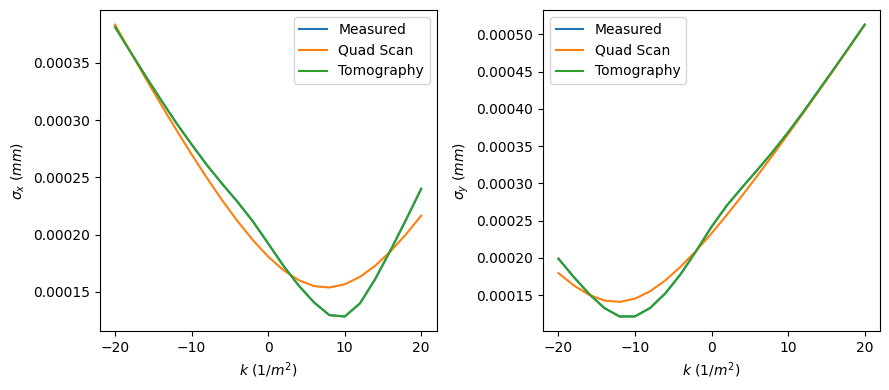

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))
axs[0].plot(recx.ks, recx.sigmas, label = 'Measured')
axs[0].plot(recx.ks, np.array(sigmasg_x), label='Quad Scan')
axs[0].plot(recx.ks, np.array(sigmas_rec_x), label='Tomography')
axs[0].set_xlabel('$k$ $(1/m^2)$')
axs[0].set_ylabel('$\sigma_x$ $(mm)$')
axs[1].plot(recx.ks, recy.sigmas, label = 'Measured')
axs[1].plot(recx.ks, np.array(sigmasg_y), label='Quad Scan')
axs[1].plot(recx.ks, np.array(sigmas_rec_y), label='Tomography')
axs[1].set_xlabel('$k$ $(1/m^2)$')
axs[1].set_ylabel('$\sigma_y$ $(mm)$')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

In [13]:
# Now let's backtrack the distribution to the entrance of the line

def backtrack_rec_dist(dist_4d):
    dist_4d_bt = dist_4d.copy()

    dist_4d_bt[:,1] = -dist_4d_bt[:,1]
    dist_4d_bt[:,3] = -dist_4d_bt[:,3]

    seq = {'drift':[0.768073-0.0708/2]}
    tr = Track(seq, dist_4d_bt)
    tr.track()
    dist_4d_rec_point = tr.dist_out
    dist_4d_rec_point[:,1] = -dist_4d_rec_point[:,1]
    dist_4d_rec_point[:,3] = -dist_4d_rec_point[:,3]
    return dist_4d_rec_point

dist_bt = backtrack_rec_dist(dist)

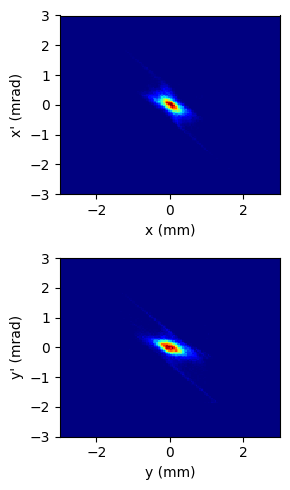

In [14]:
fig, axs = plt.subplots(2, 1, figsize= (3, 5))
_ = axs[0].hist2d(dist_bt[:,0], dist_bt[:,1], bins = 128, range=[[-3, 3],[-3, 3]])
_ = axs[1].hist2d(dist_bt[:,2], dist_bt[:,3], bins = 128, range=[[-3, 3],[-3, 3]])
axs[0].set_xlabel('x (mm)')
axs[0].set_ylabel('x\' (mrad)')
axs[1].set_xlabel('y (mm)')
axs[1].set_ylabel('y\' (mrad)')
plt.tight_layout()
plt.show()


In [15]:
dpp = 5e-4 #delta_p/p0
bunch_length = 1.2e-3 #m

# Generate longitudinal distribution

cov = np.array([[ bunch_length**2, 0],[0,dpp**2]])

p_bl = np.random.multivariate_normal((0,0), cov, size=int(0.8*dist.shape[0]))


dist_dict = {}
dist_dict['x'] = dist_bt[:,0]*1e-3
dist_dict['px'] = dist_bt[:,1]*1e-3
dist_dict['y'] = dist_bt[:,2]*1e-3
dist_dict['py'] = dist_bt[:,3]*1e-3
dist_dict['t'] = p_bl[:,0]
dist_dict['pt'] = p_bl[:,1]


In [16]:
# Export distribution in madx format
export_to = '../../old-line/awake-matching-all-master/rec_dist_example'
with open(export_to, 'wb') as f:
    pickle.dump(dist_dict, f)
    
